In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 70,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([ 0.62315255,  0.54665452,  0.45530486,  0.35139382,  0.23411691,
        0.10390853, -0.03704954, -0.18447071, -0.33199799, -0.47185934,
       -0.59637409, -0.69993216, -0.78025371, -0.83813661, -0.87618113,
       -0.89748937, -0.90486014, -0.90046138, -0.88577843, -0.86167377,
       -0.82847089, -0.7860294 , -0.73380947, -0.67093927, -0.59631169,
       -0.50875121, -0.40730312, -0.29168874, -0.16291696, -0.02390003,
        0.12026483,  0.26274908,  0.39627424,  0.51472646,  0.61429727,
        0.69369882,  0.75362498,  0.7959376 ,  0.82294619,  0.83692265,
        0.83984011,  0.83326429,  0.8183316 ,  0.79576826,  0.76591957,
        0.72877949,  0.68401432,  0.63098687,  0.56879461,  0.49634039,
        0.41247401,  0.31623939,  0.20725003,  0.08616637, -0.04483444,
       -0.18176198, -0.31886524, -0.44922858, -0.56603056, -0.66413277,
       -0.74112803, -0.79724371, -0.83439213, -0.85509562, -0.86174446,
       -0.85624093, -0.83989686, -0.81345129, -0.77712923, -0.73

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   4.79618609e-01],
       [  2.00000000e+01,   5.40107667e-01],
       [  3.00000000e+01,   5.15341938e-01],
       [  4.00000000e+01,   4.95510876e-01],
       [  5.00000000e+01,   4.94567722e-01],
       [  6.00000000e+01,   4.78342146e-01],
       [  7.00000000e+01,   3.75705034e-01],
       [  8.00000000e+01,   3.29462916e-01],
       [  9.00000000e+01,   2.24809900e-01],
       [  1.00000000e+02,   1.65608898e-01],
       [  1.10000000e+02,   1.24914169e-01],
       [  1.20000000e+02,   9.90404114e-02],
       [  1.30000000e+02,   8.22229981e-02],
       [  1.40000000e+02,   6.86122105e-02],
       [  1.50000000e+02,   5.31651005e-02],
       [  1.60000000e+02,   4.65173200e-02],
       [  1.70000000e+02,   3.75925787e-02],
       [  1.80000000e+02,   3.09311897e-02],
       [  1.90000000e+02,   3.17575373e-02],
       [  2.00000000e+02,   2.18343455e-02],
       [  2.10000000e+02,   2.06140764e-02],
       [  2.20000000e+02,   1.67572852e-02],
       [  

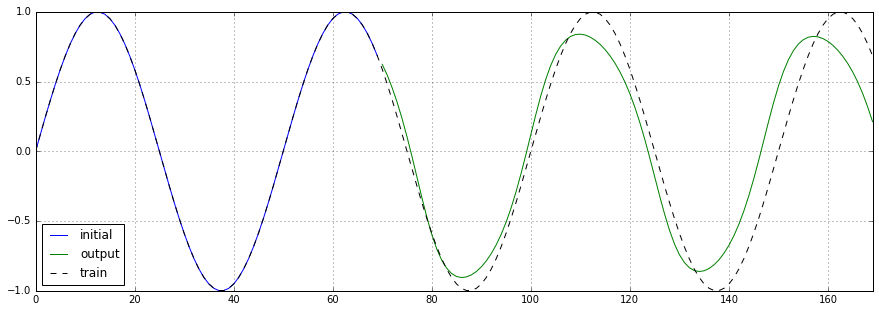

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

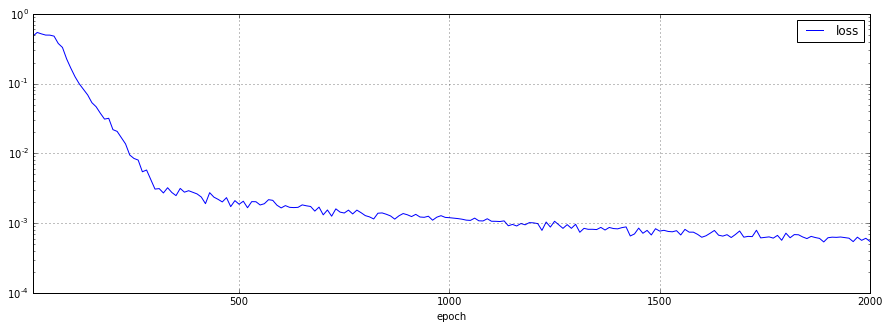

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")